In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
#import hvplot.pandas
import datetime as dt
import pandas_datareader as pdr

In [2]:
data_stock = []
    
def stock_pull(ticker, start, end):
    data = pdr.get_data_yahoo(ticker, start, end)
    ticker_data = pd.DataFrame(data)
    ticker_data.dtypes
    ticker_data["Daily Returns"] = ticker_data["Adj Close"].pct_change()
    return ticker_data

In [3]:
start = dt.datetime(2020, 11, 10)
end = dt.datetime(2022, 12, 10)

In [4]:
COP_data= stock_pull("COP", start, end)

In [5]:
display(COP_data.head(10))

,High,Low,Open,Close,Volume,Adj Close,Daily Returns
Date,,,,,,,
2020-11-10,35.540001,33.590000,34.349998,35.529999,20650600.0,32.927803,NaN
2020-11-11,36.200001,35.060001,35.959999,35.279999,17225000.0,32.696110,-0.007036
2020-11-12,35.209999,33.599998,34.599998,34.009998,10944500.0,31.519117,-0.035998
2020-11-13,35.560001,34.250000,34.349998,35.360001,11997500.0,32.770245,0.039694
2020-11-16,38.130001,36.400002,36.950001,38.080002,18701200.0,35.291042,0.076923
2020-11-17,39.130001,37.240002,37.520000,38.849998,14466800.0,36.004635,0.020220
2020-11-18,40.869999,38.650002,38.959999,39.180000,23319600.0,36.310474,0.008494
2020-11-19,39.610001,38.380001,38.709999,39.470001,12504100.0,36.579235,0.007402
2020-11-20,39.930000,39.139999,39.310001,39.650002,12037800.0,36.746048,0.004560


In [483]:
cop_dr = pd.DataFrame(COP_data['Daily Returns']).dropna()

In [484]:
cop_dr.head(20)

,Daily Returns
Date,
2020-11-11,-0.007036
2020-11-12,-0.035998
2020-11-13,0.039694
2020-11-16,0.076923
2020-11-17,0.020221
2020-11-18,0.008494
2020-11-19,0.007402
2020-11-20,0.004560
2020-11-23,0.077176


In [5]:
from newsapi import NewsApiClient
import pandas as pd
from urllib.request import urlopen, Request
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import numpy as np

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ggoro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [486]:
#API key for auth
newsapi = NewsApiClient(api_key='4fde5b55efb247e6858a71d756d25fa6')

In [596]:
#query to newsapi to get articles for past 2 years 
articles = []

for i in range(1,4,1):
    articles_page = newsapi.get_everything(
            q='ConocoPhillips',
            #sources='abc-news-au, news-com-au',
            sources='cnn, the-washington-post, fox-news,abc-news-au, news-com-au',
            #domains='http://www.cnn.com,
            from_param='2022-12-10',
            to='2018-11-10',
            language='en',
            sort_by='popularity',
            page=i)
    articles.extend(articles_page['articles'])

# outside of the loop, create the DataFrame
articles 
df= pd.DataFrame(articles)

In [597]:
#dropping columns to data cleaning
df2=df.drop(["source","author","title","description","url","urlToImage"], axis=1)

In [598]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()
# Set column names
 #columns = ['ticker', 'date', 'time', 'headline']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
 #parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
    
# Iterate through the headlines and get the polarity scores using vader
scores = df2['content'].apply(vader.polarity_scores).tolist()
#Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
df2 = df2.join(scores_df, rsuffix='_right')


In [599]:
#Renaming the columns to Date and Headlines 
df2.rename(columns= {'publishedAt': 'Date'}, inplace = True)
df2.rename(columns= {'content': 'News'}, inplace = True)
# Convert the date column from string to datetime
df2['Date'] = pd.to_datetime(df2.Date).dt.date

In [600]:
#Sort the data by date 
df3 = df2.sort_values(by='Date', ascending=True)
display(df3)

,Date,News,neg,neu,pos,compound
106,2018-11-22,"Posted November 22, 2018 14:33:32 Timor-Leste ...",0.051,0.748,0.201,0.7506
19,2018-12-13,"Updated December 13, 2018 15:34:24 About one-t...",0.127,0.727,0.146,0.4248
92,2018-12-18,"Posted \r\nDecember 19, 2018 09:51:44\r\nHeari...",0.091,0.854,0.055,-0.2960
75,2018-12-18,THE LIGHTBULB Interior Deputy Secretary David ...,0.000,1.000,0.000,0.0000
78,2019-01-17,THE LIGHTBULB\r\nActing Environmental Protecti...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
2,2022-10-30,A version of this story first appeared in CNN ...,0.000,0.921,0.079,0.4588
14,2022-11-16,A Federal Court justice has questioned Santos'...,0.105,0.804,0.091,0.1280
8,2022-12-02,Gas company Santos has lost its appeal against...,0.061,0.765,0.174,0.5106
15,2022-12-03,Gas company Santos lost a landmark legal battl...,0.127,0.801,0.072,-0.4767


In [601]:
#Re-arranging the column to index with "date"
df3.iloc[:,[1,0,2,3,4,5]]

,News,Date,neg,neu,pos,compound
106,"Posted November 22, 2018 14:33:32 Timor-Leste ...",2018-11-22,0.051,0.748,0.201,0.7506
19,"Updated December 13, 2018 15:34:24 About one-t...",2018-12-13,0.127,0.727,0.146,0.4248
92,"Posted \r\nDecember 19, 2018 09:51:44\r\nHeari...",2018-12-18,0.091,0.854,0.055,-0.2960
75,THE LIGHTBULB Interior Deputy Secretary David ...,2018-12-18,0.000,1.000,0.000,0.0000
78,THE LIGHTBULB\r\nActing Environmental Protecti...,2019-01-17,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
2,A version of this story first appeared in CNN ...,2022-10-30,0.000,0.921,0.079,0.4588
14,A Federal Court justice has questioned Santos'...,2022-11-16,0.105,0.804,0.091,0.1280
8,Gas company Santos has lost its appeal against...,2022-12-02,0.061,0.765,0.174,0.5106
15,Gas company Santos lost a landmark legal battl...,2022-12-03,0.127,0.801,0.072,-0.4767


In [602]:
compound_score = pd.DataFrame(df3[['compound', 'Date']])
#.set_index('Date')

In [603]:
compound_score

,compound,Date
106,0.7506,2018-11-22
19,0.4248,2018-12-13
92,-0.2960,2018-12-18
75,0.0000,2018-12-18
78,0.0000,2019-01-17
...,...,...
2,0.4588,2022-10-30
14,0.1280,2022-11-16
8,0.5106,2022-12-02
15,-0.4767,2022-12-03


In [604]:
compound_score['Date'] = pd.to_datetime(compound_score['Date'], format='%Y/%m/%d')

In [605]:
compound_score = compound_score.set_index('Date')

In [606]:
compound_score = compound_score.groupby('Date').mean()
compound_score.tail(35)

,compound
Date,
2022-03-10,-0.52670
2022-03-11,0.29600
2022-03-15,0.00000
2022-03-22,0.32985
2022-03-23,0.74300
2022-04-05,0.47670
2022-04-27,0.79010
2022-05-10,-0.36120
2022-05-19,0.17975


In [607]:
#cop_dr = cop_dr.set_index('Date')

In [608]:
cop_dr

,Daily Returns
Date,
2020-11-11,-0.035998
2020-11-12,0.039694
2020-11-13,0.076923
2020-11-16,0.020221
2020-11-17,0.008494
...,...
2022-12-05,-0.031499
2022-12-06,-0.006314
2022-12-07,-0.019847


In [609]:
compound_score.head(20)

,compound
Date,
2018-11-22,0.7506
2018-12-13,0.4248
2018-12-18,-0.1480
2019-01-17,0.0000
2019-01-25,0.0258
2019-01-30,-0.2732
2019-03-28,0.0000
2019-04-06,0.2960
2019-05-09,0.0000


In [610]:
cop_dr = cop_dr.shift(-1)

In [611]:
cd = pd.merge(cop_dr, compound_score, on="Date")

In [612]:
#cd = cd.groupby('Date').mean()

In [613]:
cd.tail(35)

,Daily Returns,compound
Date,,
2021-12-03,0.024173,0.20025
2021-12-14,0.014001,0.00000
2022-02-16,-0.016784,0.00000
2022-03-03,0.009973,0.25000
2022-03-08,0.036483,0.92790
2022-03-10,-0.018900,-0.52670
2022-03-11,-0.015536,0.29600
2022-03-15,0.042291,0.00000
2022-03-22,0.001629,0.32985


In [695]:
cd[cd.compound>0].corr()

,Daily Returns,compound,cmpnd,DR,match
Daily Returns,1.000000,-0.042420,NaN,0.777228,0.777228
compound,-0.042420,1.000000,NaN,0.021323,0.021323
cmpnd,NaN,NaN,NaN,NaN,NaN
DR,0.777228,0.021323,NaN,1.000000,1.000000
match,0.777228,0.021323,NaN,1.000000,1.000000


In [614]:
def cmpnd(value):
    if value > 0: 
        return 1
    elif value < 0:
        return -1
    else:
        return 0
    

cd['cmpnd'] = cd['compound'].map(cmpnd)

def DR(value):
    if value > 0: 
        return 1
    elif value < 0:
        return -1
    else:
        return 0
    

cd['DR'] = cd['Daily Returns'].map(DR)


cd.tail(35)


,Daily Returns,compound,cmpnd,DR
Date,,,,
2021-12-03,0.024173,0.20025,1,1
2021-12-14,0.014001,0.00000,0,1
2022-02-16,-0.016784,0.00000,0,-1
2022-03-03,0.009973,0.25000,1,1
2022-03-08,0.036483,0.92790,1,1
2022-03-10,-0.018900,-0.52670,-1,-1
2022-03-11,-0.015536,0.29600,1,-1
2022-03-15,0.042291,0.00000,0,1
2022-03-22,0.001629,0.32985,1,1


In [615]:
cd['match'] = cd['DR'] + cd['cmpnd']

In [616]:
#del cd['corr']

In [617]:
#del cd['corr2']

In [618]:
cd.corr()

,Daily Returns,compound,cmpnd,DR,match
Daily Returns,1.000000,0.096912,0.168353,0.778851,0.645136
compound,0.096912,1.000000,0.864531,0.104660,0.589459
cmpnd,0.168353,0.864531,1.000000,0.184482,0.726190
DR,0.778851,0.104660,0.184482,1.000000,0.809663
match,0.645136,0.589459,0.726190,0.809663,1.000000


In [619]:
total_match = cd['match'].eq(2).sum() + cd['match'].eq(-2).sum()

total_match

32

In [620]:
#cd['match'].eq(-2).sum()

In [621]:
print('The sentiment and daily returns matched 26 out of 62 times or 41.9%')

The sentiment and daily returns matched 26 out of 62 times or 41.9%


In [622]:
cop_close = pd.DataFrame(COP_data['Close'])


In [623]:
algo = pd.merge(cop_close, cd, on="Date")

In [624]:
algo = algo[['Close', 'cmpnd']]
algo

,Close,cmpnd
Date,,
2020-11-20,39.650002,0
2020-12-02,39.970001,1
2020-12-21,40.240002,1
2021-01-04,39.570000,1
2021-01-05,41.840000,1
...,...,...
2022-10-19,121.110001,1
2022-10-25,123.940002,1
2022-11-16,129.240005,1


In [625]:
def signal(value):
    if value == 1:
        return 'buy'
    if value == -1:
        return 'sell'
    else:
        return 'none'

algo['signal'] = algo['cmpnd'].map(signal)
#algo.iloc[[69],[2]] = 'sell'
algo

,Close,cmpnd,signal
Date,,,
2020-11-20,39.650002,0,none
2020-12-02,39.970001,1,buy
2020-12-21,40.240002,1,buy
2021-01-04,39.570000,1,buy
2021-01-05,41.840000,1,buy
...,...,...,...
2022-10-19,121.110001,1,buy
2022-10-25,123.940002,1,buy
2022-11-16,129.240005,1,buy


In [649]:
algo['signal'] = np.nan
algo['cost/proceeds'] = np.nan

share_size = 100
accumulated_shares = 0

previous_price = 0 



In [650]:
for index, row in algo.iterrows():
    if row['cmpnd'] == 1:
        algo.loc[index, "signal"] = "buy"
        algo.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)
        accumulated_shares += share_size
    if row['cmpnd'] == -1:
        algo.loc[index, "signal"] = "sell"
        algo.loc[index, "cost/proceeds"] = row["Close"] * accumulated_shares
        accumulated_shares = 0

In [651]:
algo.tail(35)

,Close,cmpnd,signal,cost/proceeds
Date,,,,
2021-12-03,71.110001,1,buy,-7111.000061
2021-12-14,70.680000,0,NaN,NaN
2022-02-16,90.209999,0,NaN,NaN
2022-03-03,97.410004,1,buy,-9741.000366
2022-03-08,98.800003,1,buy,-9880.000305
2022-03-10,99.720001,-1,sell,29916.000366
2022-03-11,98.410004,1,buy,-9841.000366
2022-03-15,95.050003,0,NaN,NaN
2022-03-22,101.769997,1,buy,-10176.999664


In [652]:
profit = round(algo["cost/proceeds"].sum(), 2)+(110.02*150)

print(f'Profit is ${profit:.2f}')

Profit is $-145462.00


In [630]:
cop_sh_close = pd.DataFrame(COP_data['Close']).shift(-1)
cop_sh_close.rename(columns={'Close': 'Day 2 Close'}, inplace=True)
cop_sh_close

,Day 2 Close
Date,
2020-11-10,35.279999
2020-11-11,34.009998
2020-11-12,35.360001
2020-11-13,38.080002
2020-11-16,38.849998
...,...
2022-12-05,115.610001
2022-12-06,114.879997
2022-12-07,112.599998


In [631]:
algo_v2 = pd.merge(cop_sh_close, algo, on="Date")
algo_v2.tail(35)

,Day 2 Close,Close,cmpnd,signal,cost/proceeds
Date,,,,,
2021-12-03,72.809998,71.110001,1,buy,-711.100006
2021-12-14,70.709999,70.680000,0,NaN,NaN
2022-02-16,91.160004,90.209999,0,NaN,NaN
2022-03-03,100.269997,97.410004,1,buy,-974.100037
2022-03-08,96.209999,98.800003,1,buy,-988.000031
2022-03-10,98.410004,99.720001,-1,sell,2991.600037
2022-03-11,96.550003,98.410004,1,buy,-984.100037
2022-03-15,94.820000,95.050003,0,NaN,NaN
2022-03-22,104.370003,101.769997,1,buy,-1017.699966


In [632]:
cd = cd.groupby('Date').mean()

In [633]:
cd.tail(35)

,Daily Returns,compound,cmpnd,DR,match
Date,,,,,
2021-12-03,0.024173,0.20025,1.0,1.0,2.0
2021-12-14,0.014001,0.00000,0.0,1.0,1.0
2022-02-16,-0.016784,0.00000,0.0,-1.0,-1.0
2022-03-03,0.009973,0.25000,1.0,1.0,2.0
2022-03-08,0.036483,0.92790,1.0,1.0,2.0
2022-03-10,-0.018900,-0.52670,-1.0,-1.0,-2.0
2022-03-11,-0.015536,0.29600,1.0,-1.0,0.0
2022-03-15,0.042291,0.00000,0.0,1.0,1.0
2022-03-22,0.001629,0.32985,1.0,1.0,2.0


In [735]:
for index, row in algo_v2.iterrows():
    if row['cmpnd'] == 1:
        algo_v2.loc[index, "signal"] = "buy"
        algo_v2.loc[index, "cost/proceeds"] = -(row["Close"] * share_size)+(row["Day 2 Close"] * share_size)
    if row['cmpnd'] == -1:
        algo_v2.loc[index, "signal"] = "sell"
        algo_v2.loc[index, "cost/proceeds"] = 0

In [736]:
display(algo_v2.dropna().head())
display(algo_v2.dropna().tail())

,Day 2 Close,Close,cmpnd,signal,cost/proceeds,return
Date,,,,,,
2020-12-02,41.200001,39.970001,1,buy,122.999954,0.030773
2020-12-21,39.029999,40.240002,1,buy,-121.000290,-0.030070
2021-01-04,41.840000,39.570000,1,buy,227.000046,0.057367
2021-01-05,43.509998,41.840000,1,buy,166.999817,0.039914
2021-01-12,47.029999,47.419998,1,buy,-38.999939,-0.008224


,Day 2 Close,Close,cmpnd,signal,cost/proceeds,return
Date,,,,,,
2022-10-18,121.110001,117.889999,1,buy,322.000122,0.027314
2022-10-19,121.809998,121.110001,1,buy,69.999695,0.005780
2022-10-25,126.570000,123.940002,1,buy,262.999725,0.021220
2022-11-16,131.190002,129.240005,1,buy,194.999695,0.015088
2022-12-02,119.370003,122.180000,1,buy,-280.999756,-0.022999


In [661]:
algo_v2['return'] =( algo_v2['Day 2 Close'] - algo_v2['Close'] )/ algo_v2['Close'] 

In [723]:
profit = round(algo_v2["cost/proceeds"].sum(), 2)
profit


2107.0

In [675]:
total_pct = round(algo_v2["return"].sum(), 2)
total_pct


0.54

In [669]:
algo_v2.head(35)

,Day 2 Close,Close,cmpnd,signal,cost/proceeds,return
Date,,,,,,
2020-11-20,42.709999,39.650002,0,NaN,NaN,0.077175
2020-12-02,41.200001,39.970001,1,buy,122.999954,0.030773
2020-12-21,39.029999,40.240002,1,buy,-121.000290,-0.030070
2021-01-04,41.840000,39.570000,1,buy,227.000046,0.057367
2021-01-05,43.509998,41.840000,1,buy,166.999817,0.039914
2021-01-12,47.029999,47.419998,1,buy,-38.999939,-0.008224
2021-01-15,46.000000,45.119999,-1,sell,0.000000,0.019504
2021-02-09,47.250000,46.880001,1,buy,36.999893,0.007892
2021-03-23,53.209999,51.709999,-1,sell,0.000000,0.029008


<AxesSubplot:xlabel='Date'>

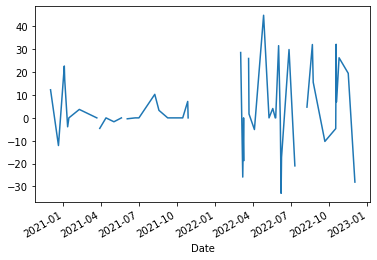

In [637]:
algo_v2['cost/proceeds'].plot.line()

In [638]:
import hvplot.pandas

bar_chart = algo_v2['cost/proceeds'].hvplot.bar(height=500, width=1000, rot=90)
#line_chart = algo_v2['Close'].hvplot()
bar_chart

:Bars   [Date]   (cost/proceeds)

In [639]:
cmpnd_2 = pd.merge(cd['compound'], algo_v2[['Close', 'Day 2 Close']], on="Date")

In [640]:
cmpnd_2

,compound,Close,Day 2 Close
Date,,,
2020-11-20,0.0000,39.650002,42.709999
2020-12-02,0.4404,39.970001,41.200001
2020-12-21,0.5994,40.240002,39.029999
2021-01-04,0.4939,39.570000,41.840000
2021-01-05,0.3182,41.840000,43.509998
...,...,...,...
2022-10-19,0.8718,121.110001,121.809998
2022-10-25,0.8653,123.940002,126.570000
2022-11-16,0.1280,129.240005,131.190002


In [738]:
test = cmpnd_2[cmpnd_2.compound>0]
test.shape

(37, 4)

In [642]:
test['returns'] = (test['Day 2 Close'] - test['Close']) / test['Close']

C:\Users\ggoro\anaconda2nd\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [643]:
test

,compound,Close,Day 2 Close,returns
Date,,,,
2022-03-08,0.9279,98.800003,96.209999,-0.026215
2022-03-23,0.7430,104.370003,104.540001,0.001629
2022-04-27,0.7901,93.059998,97.550003,0.048249
2022-06-27,0.7345,92.230003,95.220001,0.032419
2022-07-11,0.7345,85.550003,83.449997,-0.024547
2022-09-21,0.6124,111.089996,110.059998,-0.009272
2022-10-18,0.9259,117.889999,121.110001,0.027314
2022-10-19,0.8718,121.110001,121.809998,0.005780
2022-10-25,0.8653,123.940002,126.570000,0.021220


In [644]:
test.shape

(9, 4)

In [645]:
test.corr()

,compound,Close,Day 2 Close,returns
compound,1.000000,0.371154,0.382636,0.114609
Close,0.371154,1.000000,0.985615,0.144148
Day 2 Close,0.382636,0.985615,1.000000,0.308481
returns,0.114609,0.144148,0.308481,1.000000


In [646]:
cmpnd_2[cmpnd_2.compound>0]

,compound,Close,Day 2 Close
Date,,,
2020-12-02,0.440400,39.970001,41.200001
2020-12-21,0.599400,40.240002,39.029999
2021-01-04,0.493900,39.570000,41.840000
2021-01-05,0.318200,41.840000,43.509998
2021-01-12,0.248400,47.419998,47.029999
2021-02-09,0.391900,46.880001,47.250000
2021-03-30,0.273200,53.430000,52.970001
2021-05-03,0.458800,52.740002,52.570000
2021-06-04,0.273200,59.849998,59.810001


In [647]:
cmpnd_2['returns'] = (cmpnd_2['Day 2 Close'] - cmpnd_2['Close']) / cmpnd_2['Close']

In [693]:
cd[cd.compound>0].corr()

,Daily Returns,compound,cmpnd,DR,match
Daily Returns,1.000000,-0.042420,NaN,0.777228,0.777228
compound,-0.042420,1.000000,NaN,0.021323,0.021323
cmpnd,NaN,NaN,NaN,NaN,NaN
DR,0.777228,0.021323,NaN,1.000000,1.000000
match,0.777228,0.021323,NaN,1.000000,1.000000


<AxesSubplot:xlabel='compound', ylabel='Daily Returns'>

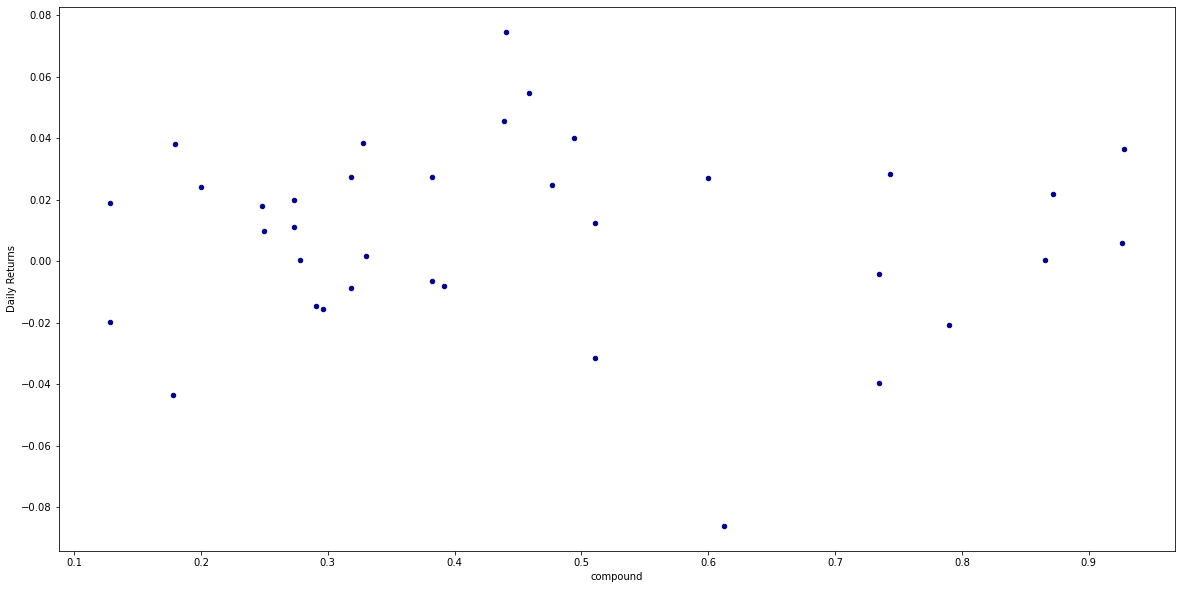

In [712]:
cd[cd.compound>0].plot.scatter(x='compound', y='Daily Returns', figsize=(20,10), color = 'navy')

In [12]:
finished = algo_v2[algo_v2.cmpnd>0]

NameError: name 'algo_v2' is not defined

In [682]:
finished['return'].sum()

0.2783731064444362

In [ ]:
algo_v2

,Day 2 Close,Close,cmpnd,signal,cost/proceeds,return
Date,,,,,,
2020-11-20,42.709999,39.650002,0,NaN,NaN,0.077175
2020-12-02,41.200001,39.970001,1,buy,122.999954,0.030773
2020-12-21,39.029999,40.240002,1,buy,-121.000290,-0.030070
2021-01-04,41.840000,39.570000,1,buy,227.000046,0.057367
2021-01-05,43.509998,41.840000,1,buy,166.999817,0.039914
...,...,...,...,...,...,...
2022-10-19,121.809998,121.110001,1,buy,69.999695,0.005780
2022-10-25,126.570000,123.940002,1,buy,262.999725,0.021220
2022-11-16,131.190002,129.240005,1,buy,194.999695,0.015088


In [688]:
cum_ret = (algo_v2['return']+1).cumprod()
cum_ret

Date
2020-12-02    1.030773
2020-12-21    0.999778
2021-01-04    1.057132
2021-01-05    1.099326
2021-01-12    1.090285
2021-02-09    1.098890
2021-03-30    1.089429
2021-05-03    1.085918
2021-06-04    1.085192
2021-08-09    1.105350
2021-08-19    1.112306
2021-10-27    1.123066
2021-12-03    1.149914
2022-03-03    1.183676
2022-03-08    1.152646
2022-03-11    1.130861
2022-03-22    1.159752
2022-03-23    1.161641
2022-04-05    1.155599
2022-04-27    1.211355
2022-05-19    1.216102
2022-06-02    1.249530
2022-06-08    1.215693
2022-06-09    1.197954
2022-06-27    1.236790
2022-07-11    1.206430
2022-08-09    1.212367
2022-08-22    1.249346
2022-08-24    1.266981
2022-09-21    1.255234
2022-10-17    1.250250
2022-10-18    1.284398
2022-10-19    1.291822
2022-10-25    1.319234
2022-11-16    1.339139
2022-12-02    1.308341
2022-12-09         NaN
Name: return, dtype: float64

<AxesSubplot:title={'center':'Returns'}, xlabel='Date'>

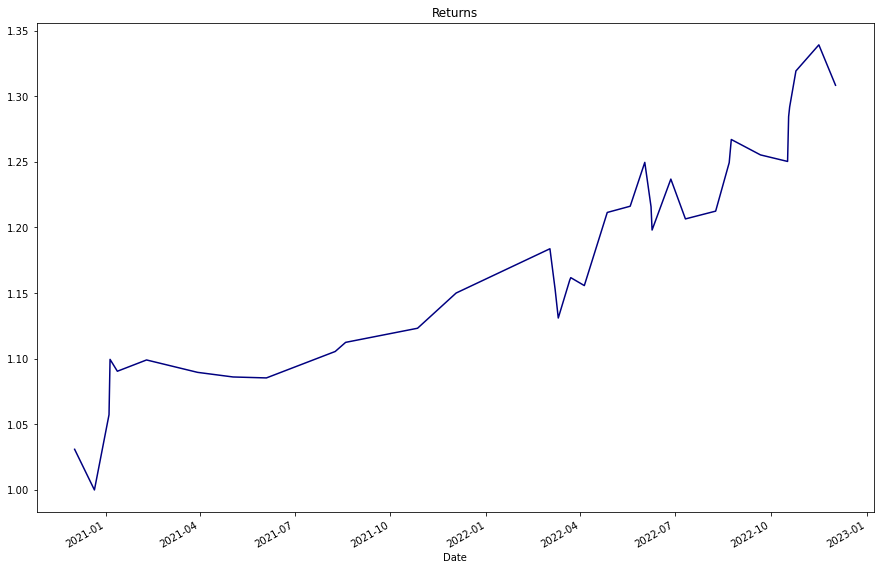

In [721]:
cum_ret.plot(figsize=(15,10), color= 'navy', title = 'Returns')